# FOLLOWING IS THE CODE WHICH WE CAN DEPLOY ON A WEBSITE TO VISUALISE & HELP IN POPULATION SEGREGATION TO PROTECT VULNERABLE POPULATION

In [1]:
#IMPORTING THE REQUIRED LIBRARIES

#For Creating dataframes, numpy arrays and pie charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For creating Bar Graph
import seaborn as sns
#For applying SVM Technique for classifying India into Zones
from sklearn import svm
from sklearn.model_selection import train_test_split
#For reading shape file of corresponding Map images
import shapefile as shp
import geopandas as gpd
# For date and time opeations
from datetime import datetime
# For file and folder operations
import os
# For regular expression opeations
import re
# For getting web contents
import requests 
# For scraping web contents
from bs4 import BeautifulSoup

In [2]:
#Reading the required datasets

df = pd.read_csv('complete.csv')
df_2 = pd.read_csv('patients_data.csv')

In [3]:
#Listing out the names of columns from both datasets

q = list(df.columns.values)
X = list(df_2.columns.values)

q, X

(['Date',
  'Name of State / UT',
  'Total Confirmed cases (Indian National)',
  'Total Confirmed cases ( Foreign National )',
  'Cured/Discharged/Migrated',
  'Latitude',
  'Longitude',
  'Death',
  'Total Confirmed cases'],
 ['patient_number',
  'p_id',
  'state_patient_number',
  'date_announced',
  'age_bracket',
  'gender',
  'detected_city',
  'detected_district',
  'detected_state',
  'state_code',
  'nationality',
  'type_of_transmission',
  'contracted_from_which_patient_suspected',
  'status_change_date',
  'current_status',
  'estimated_onset_date',
  'source1',
  'source2',
  'source3',
  'notes',
  'backup_notes'])

## Creating A pie chart to analyse Gender vs Deceased Trend

In [4]:
# Total number of males, females and NaN values from the dataset

x = df_2['gender']
sum_m = 0
sum_f = 0
sum_uk = 0

for i in x:
    if (i=='M'):
        sum_m += 1
    elif (i=='F'):
        sum_f += 1
    else:
        sum_uk += 1

In [5]:
#Looking at the results

sum_m, sum_f, sum_uk

(3547, 1766, 22577)

In [6]:
#Creating a dataframe having Gender vs deceased data(numbers)

data = {'GENDER': ['MALE', 'FEMALE', 'UNKNOWN'],
        'COUNT': [sum_m, sum_f, sum_uk]}
dss = pd.DataFrame(data, columns = ['GENDER', 'COUNT'])

#Displaying the dataframes formed
dss

,GENDER,COUNT
0,MALE,3547
1,FEMALE,1766
2,UNKNOWN,22577


## The following chart shows that the given data was not reliable as there were a lot of unknown entries in the gender column

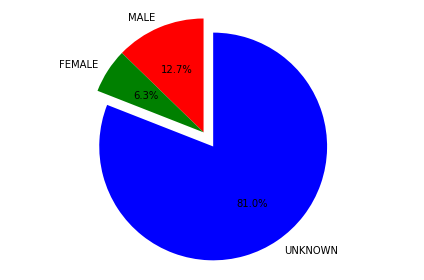

In [7]:
# Create a list of colors
colors = ["red", "green", "blue"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dss['COUNT'],
    # with the labels being officer names
    labels=dss['GENDER'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0,0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Now, let's visualise age group vs deceased data for the population infected by the virus

In [8]:
#Since the data is in form of strings, here we are converting it to integer format
df_2['age_bracket'] = pd.to_numeric(df_2['age_bracket'], errors='coerce')

#Could have used the following code also but it didn't handle NaN values correctly
#df_2['age_bracket'] = df_2['age_bracket'].astype(int)
col = df_2['age_bracket']

In [9]:
#Creating 7 Age Groups for data visualisation
L20 = 0
B30 = 0
B40 = 0
B50 = 0
B60 = 0
B70 = 0
A70 = 0
UK = 0

for i in col:
    if (i<=20):
        L20 += 1
    elif (i>20 and i<=30):
        B30 += 1
    elif (i>30 and i<=40):
        B40 += 1
    elif (i>40 and i<=50):
        B50 += 1
    elif (i>50 and i<=60):
        B60 += 1
    elif (i>60 and i<=70):
        B70 += 1
    elif (i>70):
        A70 += 1
    else:
        UK += 1

In [10]:
#Creating the dataframe
data_frame = {'AGE GROUP': ['Below 20', 'B/W 20 & 30', 'B/W 30 & 40', 'B/W 40 & 50', 'B/W 50 & 60', 'B/W 60 & 70', 'Above 70'],
            'COUNT': [L20,B30,B40,B50,B60,B70,A70]}
dsss = pd.DataFrame(data_frame, columns = ['AGE GROUP', 'COUNT'])
#Displaying the resultant table
dsss

,AGE GROUP,COUNT
0,Below 20,328
1,B/W 20 & 30,510
2,B/W 30 & 40,537
3,B/W 40 & 50,383
4,B/W 50 & 60,306
5,B/W 60 & 70,204
6,Above 70,74


#### As seen above, we have dropped the unknown count as they were quite large. Hence for better understaning, we have considered only the known entries.

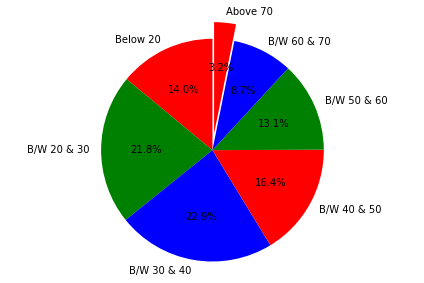

In [11]:
# Create a pie chart
plt.pie(
    # using data total)arrests
    dsss['COUNT'],
    # with the labels being officer names
    labels=dsss['AGE GROUP'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0,0,0,0,0,0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Now we'll look at bar graph representation of India on the basis of total number of cases both State-Wise and District-Wise for a basic static understanding of number of cases.

In [12]:
COL = df_2['detected_district']
#Creating the dataframe consisting of value count of respective districts from the dataset
DF = pd.DataFrame(COL.value_counts())
#Displaying the table
DF.head(5)

,detected_district
Mumbai,2687
Ahmadabad,2181
Indore,1036
Jaipur,808
Pune,680


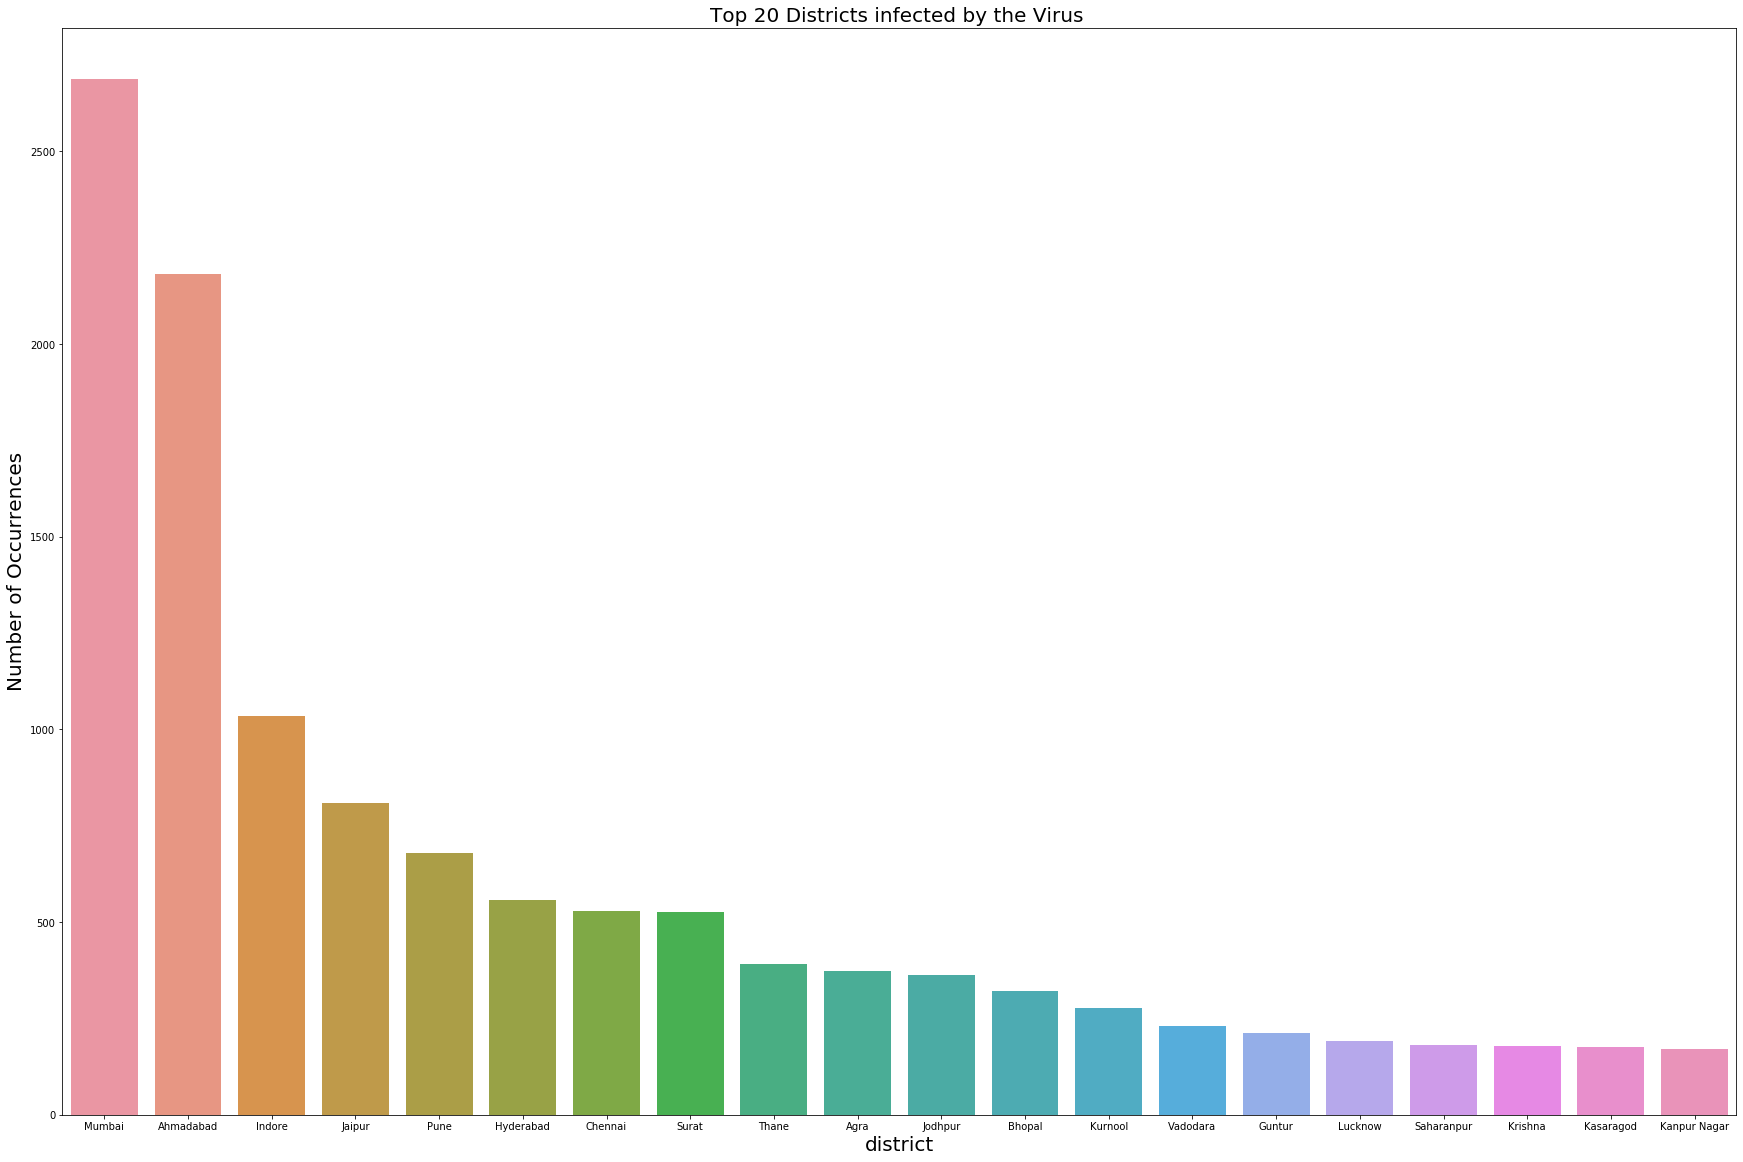

In [13]:
district_count  = df_2['detected_district'].value_counts()
#Selecting first 20 rows for better visualisation
district_count = district_count[:20,]
plt.figure(figsize=(30,20))
#using seaborn library for creating the bar graph
sns.barplot(district_count.index, district_count.values)
plt.title('Top 20 Districts infected by the Virus ', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('district', fontsize=20)
plt.show()

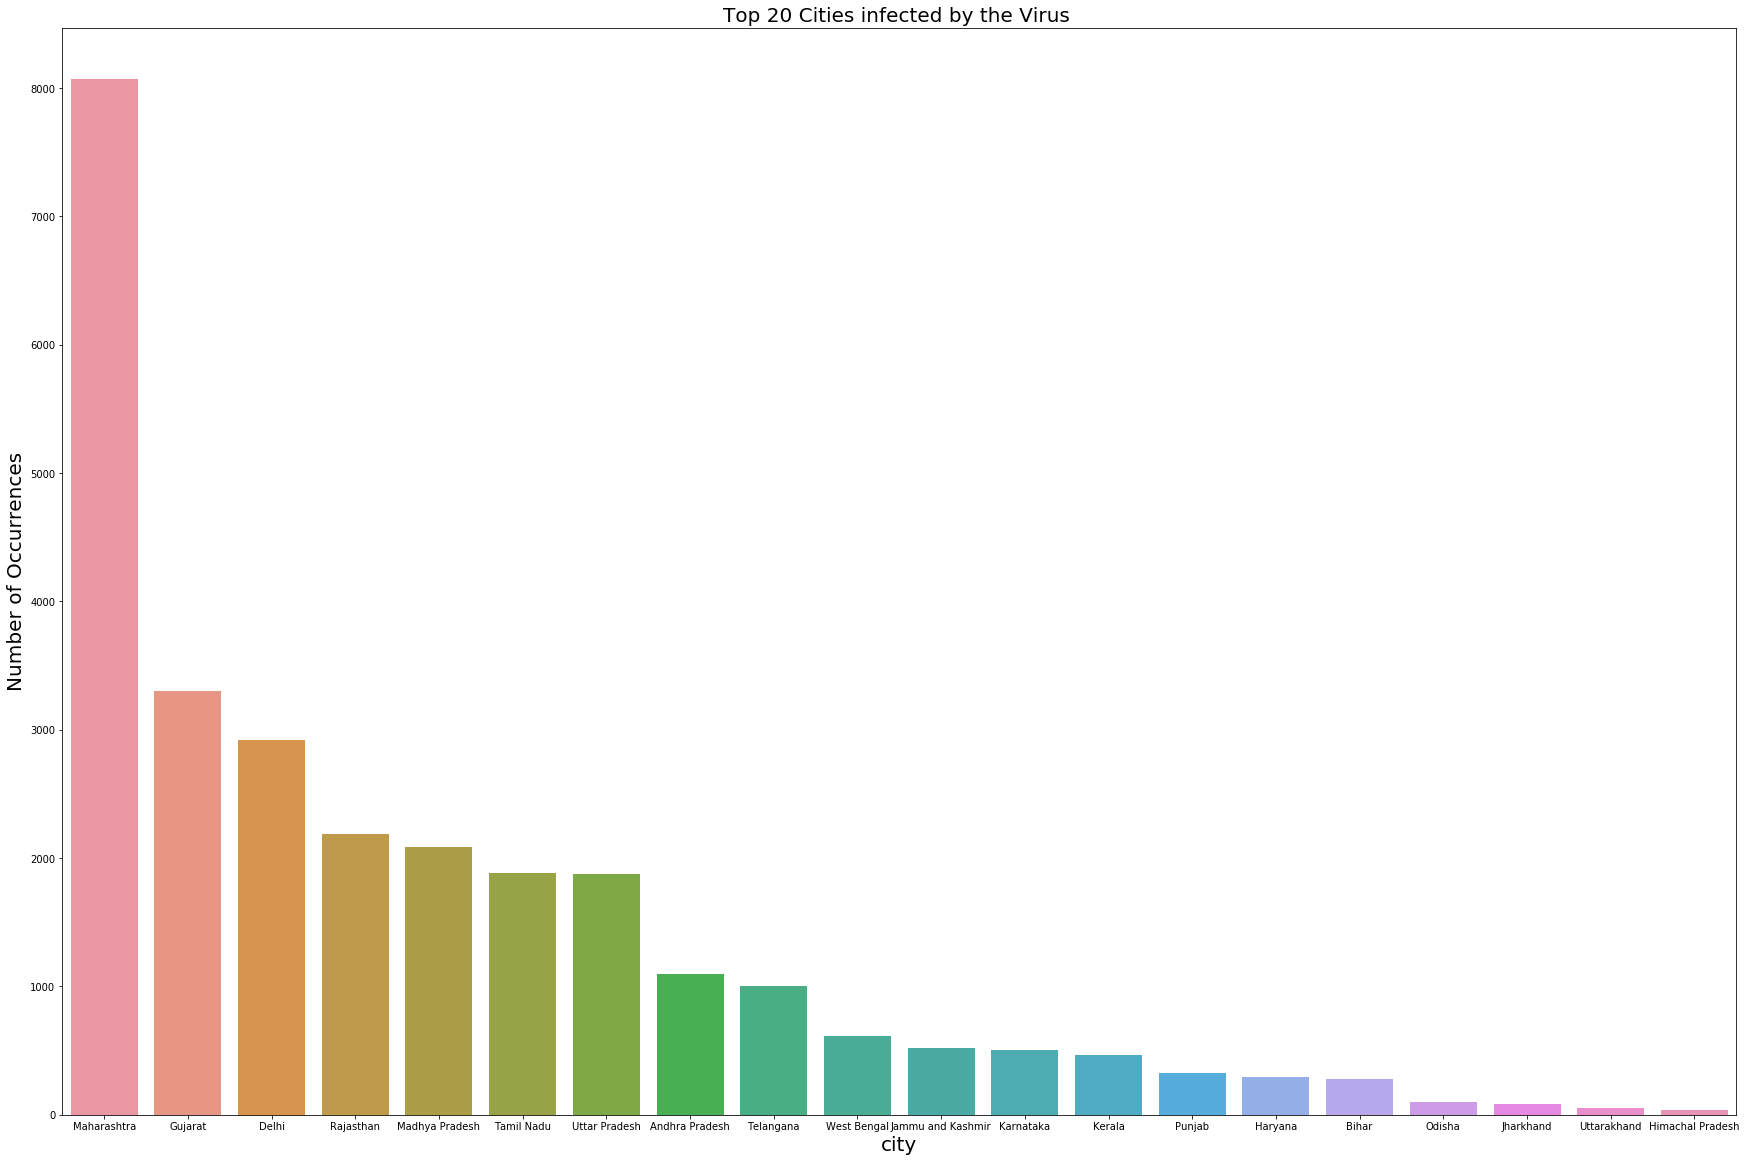

In [14]:
city_ = df_2['detected_state'].value_counts()
#Selecting first 20 rows for better visualisation
city_ = city_[:20,]
plt.figure(figsize=(30,20))
#using seaborn library for creating the bar graph
sns.barplot(city_.index, city_.values)
plt.title('Top 20 Cities infected by the Virus ', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('city', fontsize=20)
plt.show()

## Now we'll look at heat-map representation of India on the basis of total number of cases both State-Wise and District-Wise for a more detailed understanding which would help in further evaluating the Zone-Classification done by the Central Govt. 2 days ago.

#### Creating lists district and value containing the district along with its respective number of cases which will be used later for heat-map representation

In [15]:
city = df_2['detected_district'].value_counts()

district = []
value = []

for i in city.index:
    district.append(i)
    
for i in city.values:
    value.append(i)

#### Creating lists State and Value containing the state along with its respective number of cases which will be used later for heat-map representation

In [16]:
city_new = df_2['detected_state'].value_counts()

State = []
Value = []

for i in city_new.index:
    State.append(i)
    
for i in city_new.values:
    Value.append(i)

#### Creating lists district and value containing the district along with its respective number of cases which will be used later for heat-map representation

In [17]:
red_zone = []
orange_zone = []
green_zone = []

for i,j in zip(district,value):
    if(j >= 300):
        red_zone.append(i)
    elif(j >= 80 and j<300):
        orange_zone.append(i)
    else:
        green_zone.append(i)

In [18]:
COL_red = []
COL_orange = []
COL_green = []

for i in range(0, len(red_zone)):
    COL_red.append('Red Zone')

for i in range(0, len(orange_zone)):
    COL_orange.append('Orange Zone')

for i in range(0, len(green_zone)):
    COL_green.append('Green Zone')

In [19]:
d = {'ZONE':COL_red,'District':red_zone}
DFS = pd.DataFrame(d)

d1 = {'ZONE':COL_orange,'District':orange_zone}
DFSS = pd.DataFrame(d1)

d2 = {'ZONE':COL_green,'District':green_zone}
DFSSS = pd.DataFrame(d2)

D_f = DFS.append(DFSS, ignore_index = True)
D_final = D_f.append(DFSSS, ignore_index = True)

### Initially our plan was to use SVM to show the three zones seperately but it didn't give the desired output. Following is the code for the same

In [21]:
y = D_final[['ZONE']]
x = D_final[['District']]

from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
district_encoded=le.fit_transform(x)
#print(district_encoded)
y = np.ravel(y)
label=le.fit_transform(y)

#### Final Steps for heat-map creation

In [22]:
# reading the state wise shapefile of India in a GeoDataFrame and preview it

fp = "Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


#### Seeing the contents of the shape file

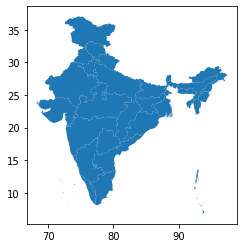

In [24]:
map_df.plot()

In [25]:
#Creating the dataframe which is to be used for map plotting
dsa = {'STATE':State, 'COUNT':Value}
DSA = pd.DataFrame(dsa)

In [26]:
# Join both the DataFrames by state names

merged = map_df.set_index('st_nm').join(DSA.set_index('STATE'))
merged.head()

,geometry,COUNT
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",36.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",277.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",36.0


C:\Users\daddy\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


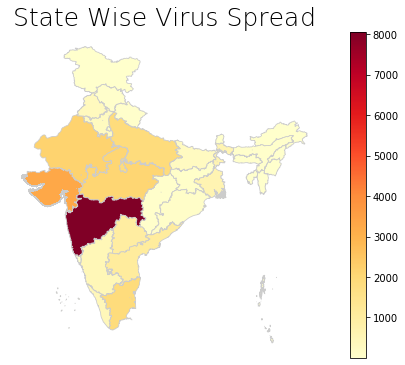

In [27]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Virus Spread', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='COUNT', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#### Doing the same thing for district-wise visualisation

In [28]:
# reading the district wise shapefile of India in a GeoDataFrame and preview it

fp = "GIS_file_of_India_State,_District_and_Tehsil_Boundaries\commondata\ind_adm_shp\IND_adm2.shp"
map_df = gpd.read_file(fp)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Nicobar Islands,IN.AN.NI,0,None,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
1,105,IND,India,1,Andaman and Nicobar,2,North and Middle Andaman,IN.AN.NM,0,None,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
2,105,IND,India,1,Andaman and Nicobar,3,South Andaman,IN.AN.SA,0,None,District,District,None,None,"MULTIPOLYGON (((93.83970 12.32082, 93.85775 12..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,IN.AD.AN,0,None,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,IN.AD.CH,0,None,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."


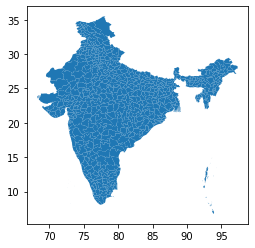

In [29]:
# Retrieving the required columns and plot default map

map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()

In [30]:
#Creating the dataframe which is to be used for map plotting
das = {'DISTRICT':district, 'COUNT':value}
DAS = pd.DataFrame(das)

In [31]:
# Join both the DataFrames by district names

merged = map_df.set_index('NAME_2').join(DAS.set_index('DISTRICT'))
merged.head()

,geometry,COUNT
Adilabad,"POLYGON ((78.33625 19.88319, 78.34669 19.88140...",18.0
Agar Malwa,"POLYGON ((76.23512 24.10518, 76.23595 24.09977...",7.0
Agra,"POLYGON ((77.90040 27.26083, 77.90006 27.25176...",374.0
Ahmadabad,"POLYGON ((72.04340 23.50300, 72.04224 23.49303...",2181.0
Ahmadnagar,"POLYGON ((74.49038 19.98079, 74.48566 19.97225...",29.0


In [32]:
# Since there were some null entries, we fill them by the mean of the count column.
#Even though this causes some discrepancy, our aim is to explain hwo we can use Data analysis tools to protect people 
#in such danger zones

merged['COUNT'].fillna(merged['COUNT'].mean(), inplace=True)
merged.isna().sum()

geometry    0
COUNT       0
dtype: int64

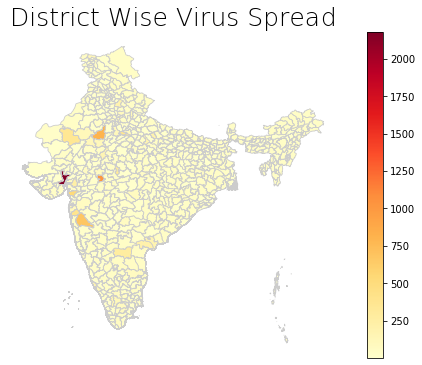

In [33]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('District Wise Virus Spread', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='COUNT', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

## Since the dataset used above had a lot of unknown entries and the map-visualisation wasn't quite understandable, so here we now use official govt. website data through web-scrapping

In [34]:
# link at which web data recides
url = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(url)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

### The data we require is present in the form of a table, so here we extract the required table head, body and rows

In [35]:
# get the table head
thead = soup.find_all('thead')[-1]

# get all the rows in table head
head = thead.find_all('tr')

# get the table tbody
tbody = soup.find_all('tbody')[-1]

# get all the rows in table body where each row contains the states' data
body = tbody.find_all('tr')

### Storing the data we need in form of head_rows and body_rows list

In [36]:
# List for maintaining column titles
head_rows = []
# List for maintaining the body contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)

### Finally creating the dataframe required for heat-map plotting

In [38]:
# Here we drop the last 3 rows as we don't need that information
df_bs = pd.DataFrame(body_rows[:len(body_rows)-4], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

df_bs.shape

(32, 4)

In [39]:
State_col = df_bs[['Name of State / UT']]

In [40]:
X = list(df_bs.columns.values)
X

['Name of State / UT',
 'Total Confirmed cases (Including 111 foreign Nationals) ',
 'Cured/Discharged/Migrated',
 'Death']

### Converting the required column into integer format as required

In [41]:
df_bs['Total Confirmed cases (Including 111 foreign Nationals) '] = df_bs['Total Confirmed cases (Including 111 foreign Nationals) '].astype(int)
Cases_Count = df_bs[['Total Confirmed cases (Including 111 foreign Nationals) ']]

In [42]:
frames = [State_col, Cases_Count]
result = pd.concat(frames, axis=1)

In [44]:
# reading the state wise shapefile of India in a GeoDataFrame and preview it

fp = "Indian_States.shp"
map_df_new = gpd.read_file(fp)
map_df_new.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [45]:
# Join both the DataFrames by state names

merged = map_df_new.set_index('st_nm').join(result.set_index('Name of State / UT'))
merged.head()

,geometry,Total Confirmed cases (Including 111 foreign Nationals)
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",43.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",481.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",88.0


### Filling the null entries just to avoid any error during visualisation.

In [46]:
merged['Total Confirmed cases (Including 111 foreign Nationals) '].fillna(merged['Total Confirmed cases (Including 111 foreign Nationals) '].mean(), inplace=True)

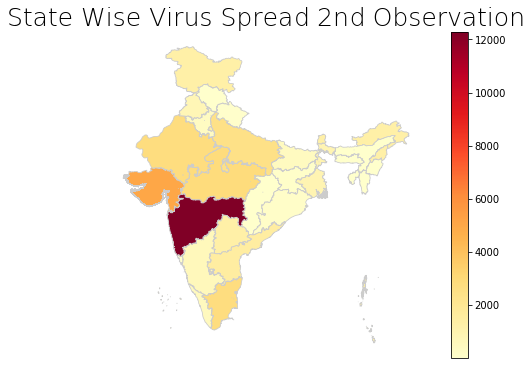

In [47]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Virus Spread 2nd Observation', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='Total Confirmed cases (Including 111 foreign Nationals) ', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Using the above codes and observations, if we deploy this model on a website/ app, we can provide live updates (since it contains data from the govt. website) to people depending on their districts so as to protect them and fulfill our theme of protecting vulnerable population